# Ridge and Lasso regression explained and performance contrasted on synthetic 2-D data

# Ridge Regression:


The cost function of linear regression gains a penalty factor through ridge regression. The L2 norm (sum of the squared coefficients) multiplied by a regularisation parameter (lambda) yields this penalty term. The regularization parameter regulates the amount of shrinkage applied to the coefficients. Large coefficients are penalised in ridge regression, which lessens the impact of multicollinearity.

# Lasso Regression:

Lasso regression also adds a penalty term to the linear regression cost function, but it uses the L1 norm (sum of the absolute coefficients) instead of the L2 norm. Like Ridge regression, Lasso regression also involves a regularization parameter (lambda), which controls the amount of shrinkage applied to the coefficients. Lasso regression has the added benefit of performing feature selection, as it tends to shrink coefficients all the way to zero, effectively removing some predictors from the model.



# Introduction


This Jupyter Notebook demonstrates Ridge and Lasso regression on synthetic 2-D data.
We'll cover the following steps:
1. Generate synthetic 2-D data.
2. Split the data into training and testing sets.
3. Perform Ridge and Lasso regression with cross-validation for hyperparameter tuning.
4. Evaluate the models using mean squared error.
5. Plot actual vs predicted values for comparison.


In [6]:


# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error




# Step 2: Generate Synthetic Data
Generate synthetic 2-D data with a linear relationship and some noise

In [7]:
X, y = make_regression(n_samples=100, n_features=2, noise=10, random_state=42)


# Step 3: Split Data
Split the data into training and testing sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Ridge Regression
Perform Ridge regression with cross-validation for hyperparameter tuning

In [9]:
ridge = Ridge()
alphas = np.logspace(-3, 3, 100)  # Range of alpha values for regularization
ridge_params = {'alpha': alphas}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722e-02, 1.23284674e-02, 1....
       4.03701726e+01, 4.64158883e+01, 5.33669923e+01, 6.13590727e+01,
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+02,
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03])})

# Step 5: Lasso Regression
Perform Lasso regression with cross-validation for hyperparameter tuning

In [10]:
lasso = Lasso()
lasso_params = {'alpha': alphas}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722e-02, 1.23284674e-02, 1....
       4.03701726e+01, 4.64158883e+01, 5.33669923e+01, 6.13590727e+01,
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+02,
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03])})

# Step 6: Predictions
Make predictions using the trained models on the test set

In [11]:
ridge_pred = ridge_grid.predict(X_test)
lasso_pred = lasso_grid.predict(X_test)

# Step 7: Evaluation
Evaluate the models using mean squared error

In [12]:
ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)


# Step 8: Plotting
Plot actual vs predicted values for comparison between Ridge and Lasso regression

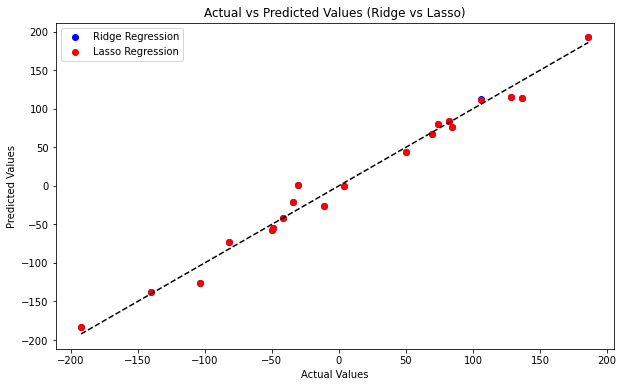

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge_pred, color='blue', label='Ridge Regression')
plt.scatter(y_test, lasso_pred, color='red', label='Lasso Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Ridge vs Lasso)')
plt.legend()
plt.show()

# Step 9: Conclusion
Summarize the findings and display the MSE and best alpha values for both Ridge and Lasso regression

In [14]:
print("Ridge Regression MSE:", ridge_mse)
print("Lasso Regression MSE:", lasso_mse)
print("Ridge Regression Best Alpha:", ridge_grid.best_params_)
print("Lasso Regression Best Alpha:", lasso_grid.best_params_)

Ridge Regression MSE: 154.80340861939246
Lasso Regression MSE: 154.93038698772477
Ridge Regression Best Alpha: {'alpha': 0.13219411484660287}
Lasso Regression Best Alpha: {'alpha': 0.1519911082952933}
